In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# The resulting "fish" is a dictionary containing:
# - fish['all_params'] == parameter names
# - fish['conds']      == covariance matrix condition number for each ell
# - fish['cov']        == covariance matrix (inverse Fisher)
# - fish['fish']       == Fisher matrix
# - fish['me']         == fiducial values of parameters
# - fish['prec']       == precision of each parameters, i.e. "wid / me"
# - fish['wid']        == marginalised 1 sigma constraints

In [2]:
import numpy as np

In [3]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math
plt.rcParams['savefig.facecolor']='white'
matplotlib.style.use('dark_background') 
matplotlib.style.use('default') 

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('font',size=14)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=15)
plt.rc('mathtext', fontset="cm")
plt.rc('font', family='Serif')
plt.rcParams['axes.xmargin'] = 0

from getdist import plots, loadMCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist

import sfishx_utils as sut

### Stephane Fisher euclid pess vs euclid opti

In [4]:
fish_folder = '/home/merda'
model_name = 'LCDM'
fiducial = {
    'om': 0.32, 'ob': 0.05, 'h': 0.67, 'ns': 0.96, 'sigma8': 0.8153222990048414,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"b_1", r"b_2", r"b_3", 
               r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_10", r"a_{\rm IA}", r"e_{\rm IA}", 
               r"b_{\rm IA}",
               ]


labels_LCDM_tex = [
r"$\Omega_{\rm m}$", r"$\Omega_{ b}$", r"$h$", r"$n_s$", r"$\sigma_8$", r"$\gamma$",
r"$b_1$", r"$b_2$", r"$b_3$", r"$b_4$", r"$b_5$", r"$b_6$", r"$b_7$", r"$b_8$", r"$b_9$", r"$b_{10}$",
r"$a_{\rm IA}$", r"$e_{\rm IA}$", r"$b_{\rm IA}$"         
]


fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, steph_model='flat_LCDM', stephane = True)

In [5]:
import inspect
inspect.getmembers(fut, inspect.ismethod)

[('__init__',
  <bound method Fish_utils.__init__ of <sfishx_utils.fish_utils.Fish_utils object at 0x7fbf93d0bfd0>>),
 ('get_E',
  <bound method Fish_utils.get_E of <sfishx_utils.fish_utils.Fish_utils object at 0x7fbf93d0bfd0>>),
 ('get_Ecmb',
  <bound method Fish_utils.get_Ecmb of <sfishx_utils.fish_utils.Fish_utils object at 0x7fbf93d0bfd0>>),
 ('get_cmb',
  <bound method Fish_utils.get_cmb of <sfishx_utils.fish_utils.Fish_utils object at 0x7fbf93d0bfd0>>)]

In [6]:
specs = ['pess', 'opti']
E = {}
for spec in specs:
    E[spec] = fut.get_E(spec)

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

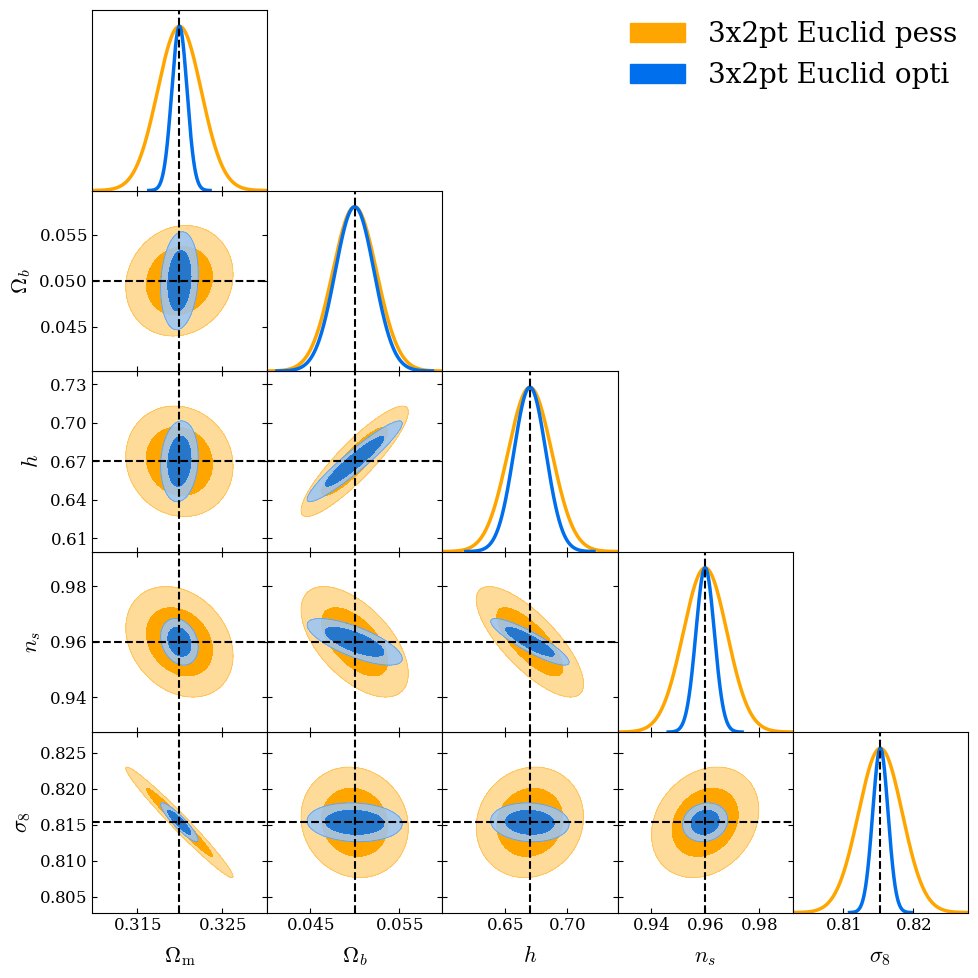

In [7]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], E[specs[1]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'], E[specs[1]]['FMsample'] ],
                E[specs[0]]['param_names'][0:5],
                filled=[True, True],
                contour_lws = [2.5, 2.5],
                legend_labels = leg_lab,
                legend_loc='upper right',
                # contour_colors=['orange', 'green'],
                contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                #param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### my fishers IG euclid pess vs euclid opti

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

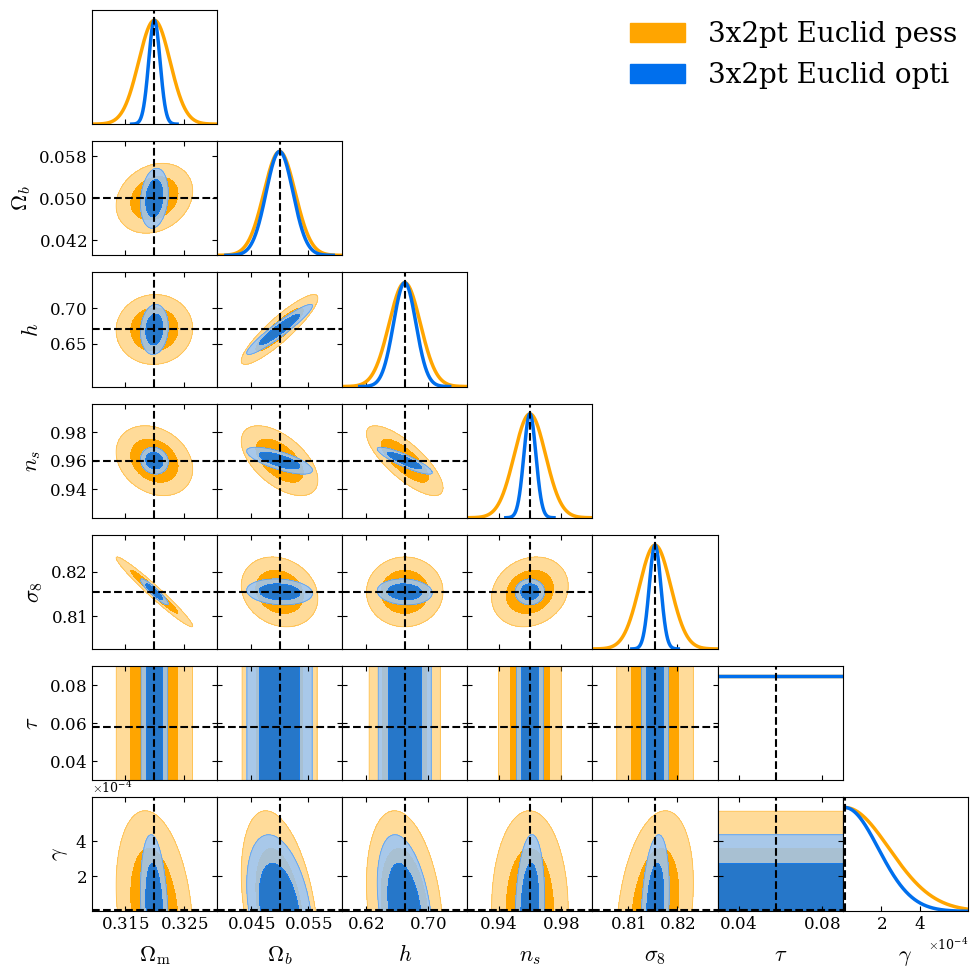

In [8]:
fish_folder = '/media/veracrypt1/work_archives/archives/Code/CMBXC/forecast/cmbx_forecasts_outputs/fishers/ig'
model_name = 'IG'
fiducial = {
    'om': 0.32, 'ob': 0.05, 'h': 0.67, 'ns': 0.96, 'sigma8':  0.8154909836594281, 'tau':     0.058,
    'gamma_IG':1.e-05,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"\gamma",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
]

fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)
specs = ['pess', 'opti']
E = {}
for spec in specs:
    E[spec] = fut.get_E(spec)

g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], E[specs[1]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'], E[specs[1]]['FMsample'] ],
                E[specs[0]]['param_names'][0:7],
                filled=[True, True],
                contour_lws = [2.5, 2.5],
                legend_labels = leg_lab,
                legend_loc='upper right',
                # contour_colors=['orange', 'green'],
                contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 6.5e-04),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### my fishers NMC euclid pess vs euclid opti

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

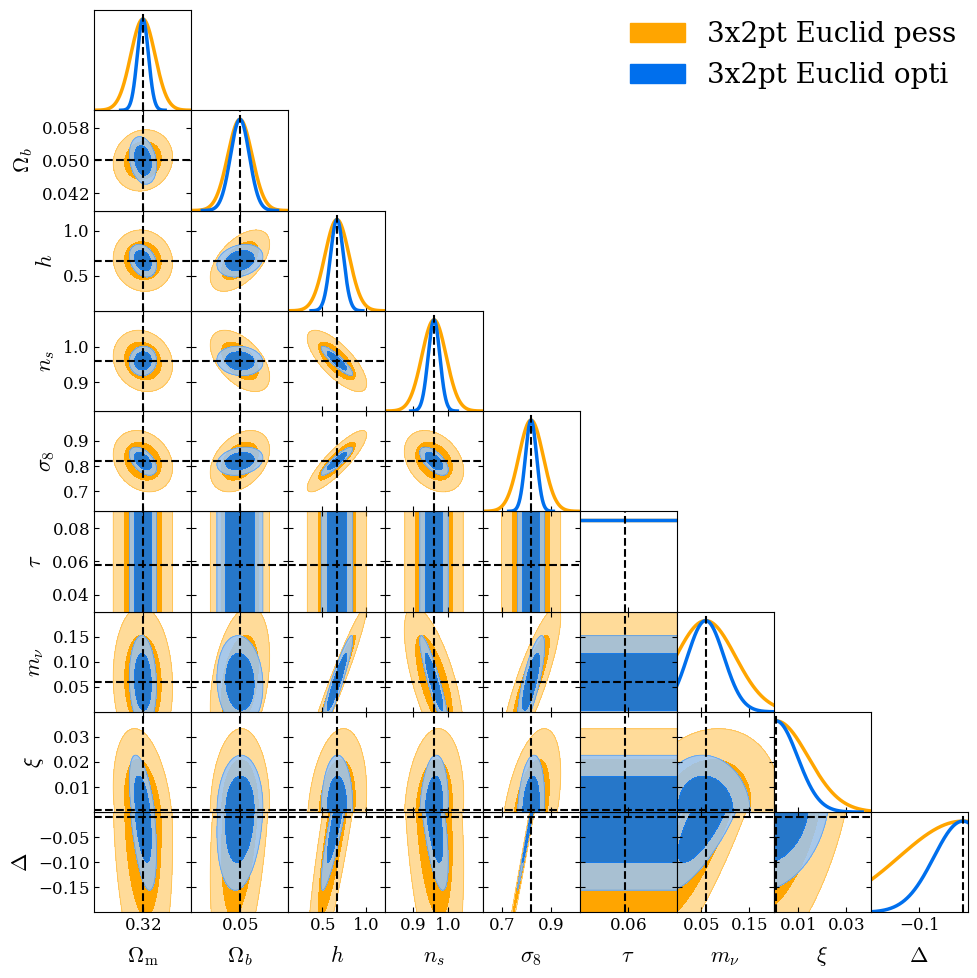

In [9]:
fish_folder = '/media/veracrypt1/work_archives/archives/Code/CMBXC/forecast/cmbx_forecasts_outputs/fishers/mnu/nmcxp_Delta'
model_name = 'NMCxpDelta'
fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
]

fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)
specs = ['pess', 'opti']
E = {}
for spec in specs:
    E[spec] = fut.get_E(spec)

g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], E[specs[1]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'], E[specs[1]]['FMsample'] ],
                E[specs[0]]['param_names'][0:9],
                filled=[True, True],
                contour_lws = [2.5, 2.5],
                legend_labels = leg_lab,
                legend_loc='upper right',
                # contour_colors=['orange', 'green'],
                contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### Stephane fishers euclid vs euclid + cmb vs euclid +X CMB

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

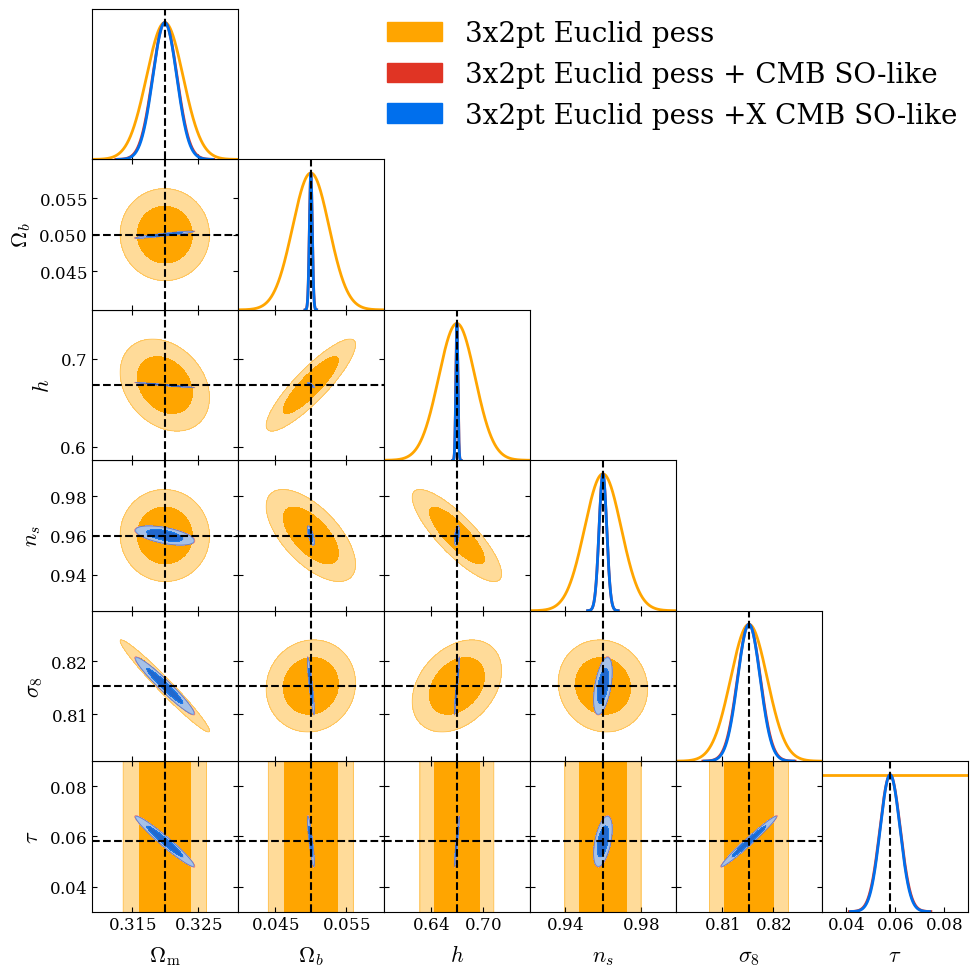

In [10]:
fish_folder = '/merda'
model_name = 'LCDM'
fiducial = {
    'om': 0.32, 'ob': 0.05, 'h': 0.67, 'ns': 0.96, 'sigma8': 0.8153222990048414, 'tau':     0.058,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"b_1", r"b_2", r"b_3", 
               r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_10", r"a_{\rm IA}", r"e_{\rm IA}", 
               r"b_{\rm IA}",
               ]


# in order to plot Euclid alone together with Euclid x CMB I need steph_tau = True
fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, steph_model='flat_LCDM', stephane = True, steph_tau = True)

specs = ['pess', 'opti']
spec = 'pess'
E = {}
E[spec] = fut.get_E(spec)

E_cmb = {}
cmb = 'SO'
modes = ['p', 'c']
probe = None
for mode in modes:
    E_cmb[mode] = fut.get_Ecmb(spec, cmb, mode, probes=probe)


g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], E_cmb[modes[0]]['label'], E_cmb[modes[1]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'],E_cmb[modes[0]]['FMsample'], E_cmb[modes[1]]['FMsample'] ],
                E[specs[0]]['param_names'][0:6],
                filled=[True, True],
                contour_lws = [2, 2, 2],
                legend_labels = leg_lab,
                legend_loc='upper right',
                # contour_colors=['orange', 'green'],
                contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### my fishers NMC euclid vs euclid + cmb vs euclid +X CMB

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

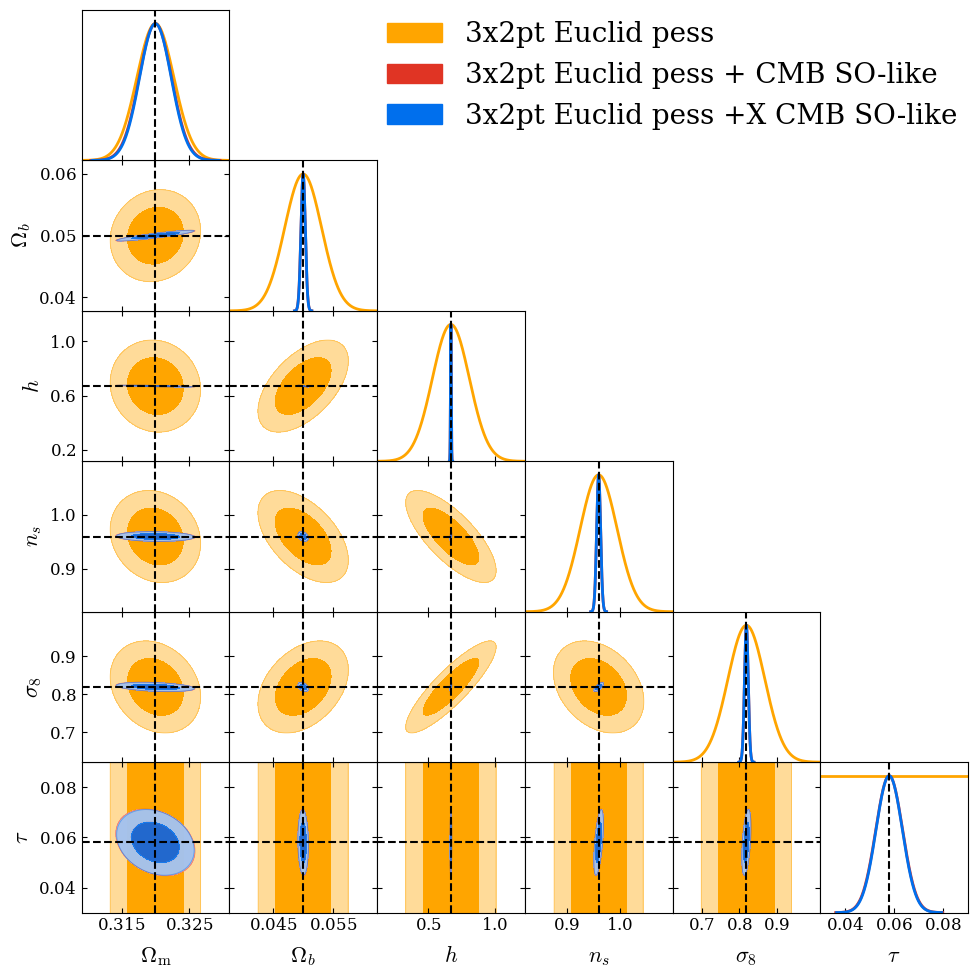

In [11]:
fish_folder = '/media/veracrypt1/work_archives/archives/Code/CMBXC/forecast/cmbx_forecasts_outputs/fishers/mnu/nmcxp_Delta'
model_name = 'NMCxpDelta'
fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
]

fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)

specs = ['pess', 'opti']
spec = 'pess'
E = {}
E[spec] = fut.get_E(spec)

E_cmb = {}
cmb = 'SO'
modes = ['p', 'c']
probe = None
for mode in modes:
    E_cmb[mode] = fut.get_Ecmb(spec, cmb, mode, probes=probe)


g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], E_cmb[modes[0]]['label'], E_cmb[modes[1]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'],E_cmb[modes[0]]['FMsample'], E_cmb[modes[1]]['FMsample'] ],
                E[specs[0]]['param_names'][0:6],
                filled=[True, True],
                contour_lws = [2, 2, 2],
                legend_labels = leg_lab,
                legend_loc='upper right',
                # contour_colors=['orange', 'green'],
                contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### Stephane fishers euclid alone vs cmb alone

In [12]:
fish_folder = '/merda'
model_name = 'LCDM'
fiducial = {
    'om': 0.32, 'ob': 0.05, 'h': 0.67, 'ns': 0.96, 'sigma8': 0.8153222990048414, 'tau':     0.058,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"b_1", r"b_2", r"b_3", 
               r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_10", r"a_{\rm IA}", r"e_{\rm IA}", 
               r"b_{\rm IA}",
               ]


# in order to plot Euclid alone together with Euclid x CMB I need steph_tau = True
fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, steph_model='flat_LCDM', stephane = True, steph_tau = True)

specs = ['pess', 'opti']
spec = 'pess'
E = {}
E[spec] = fut.get_E(spec)

In [13]:
fish_folder = '/merda'
model_name = 'LCDM'
fiducial = {
    'om': 0.32, 'ob': 0.05, 'h': 0.67, 'ns': 0.96, 'sigma8': 0.8153222990048414, 'tau':     0.058,
}

labels = [r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", 
               ]

# in order to plot Euclid alone together with Euclid x CMB I need steph_tau = True
fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, steph_model='flat_LCDM', stephane = True, steph_tau = True)

cmb_only = {}
cmbs = ['planck', 'SO' , 'S4']

for cmb in cmbs:
    cmb_only[cmb] = fut.get_cmb(cmb)

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

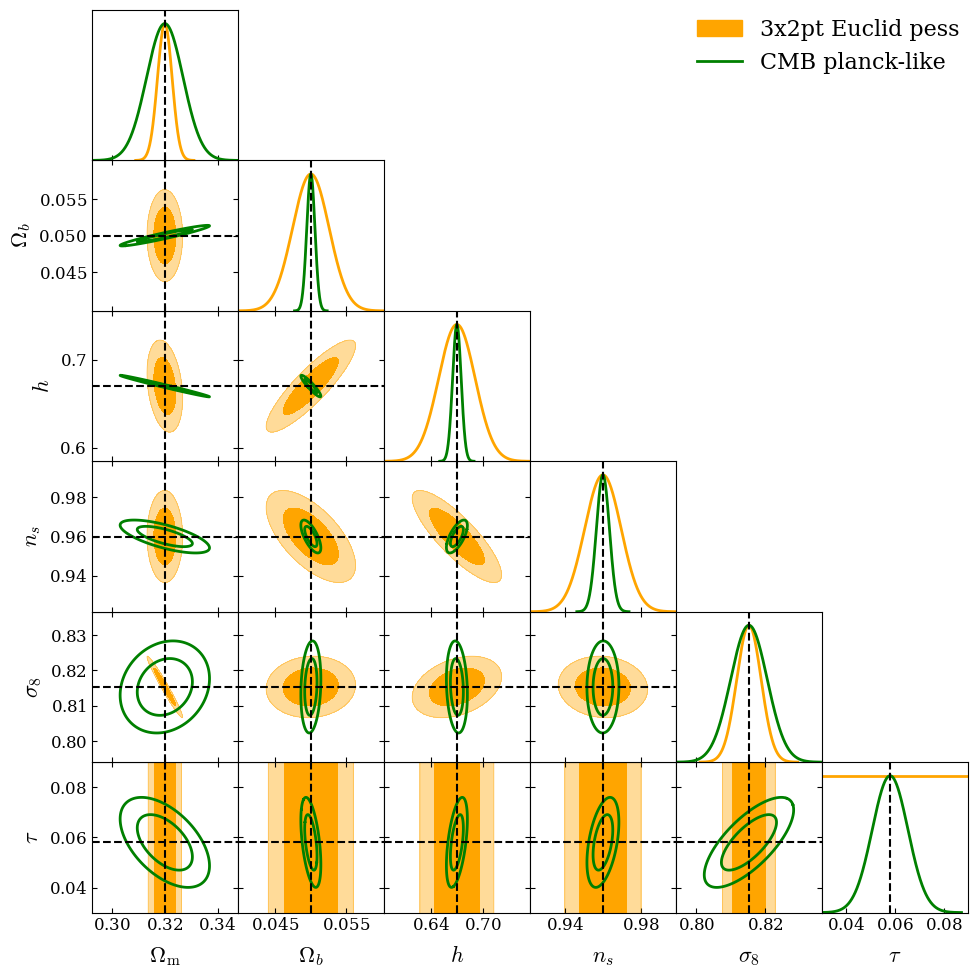

In [14]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], cmb_only[cmbs[0]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'], cmb_only[cmbs[0]]['FMsample']],
                E[specs[0]]['param_names'][0:6],
                filled=[True, False],
                contour_lws = [2, 2, 2],
                legend_labels = leg_lab,
                legend_loc='upper right',
                contour_colors=['orange', 'green'],
                # contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### my fishers NMC euclid alone vs cmb alone

In [15]:
fish_folder = '/media/veracrypt1/work_archives/archives/Code/CMBXC/forecast/cmbx_forecasts_outputs/fishers/mnu/nmcxp_Delta'
model_name = 'NMCxpDelta'

fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
]

fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)

specs = ['pess', 'opti']
spec = 'pess'
E = {}
E[spec] = fut.get_E(spec)

In [16]:
fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta"
]

# in order to plot Euclid alone together with Euclid x CMB I need steph_tau = True
fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)

cmb_only = {}
cmbs = ['planck', 'SO' , 'S4']

for cmb in cmbs:
    cmb_only[cmb] = fut.get_cmb(cmb)

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

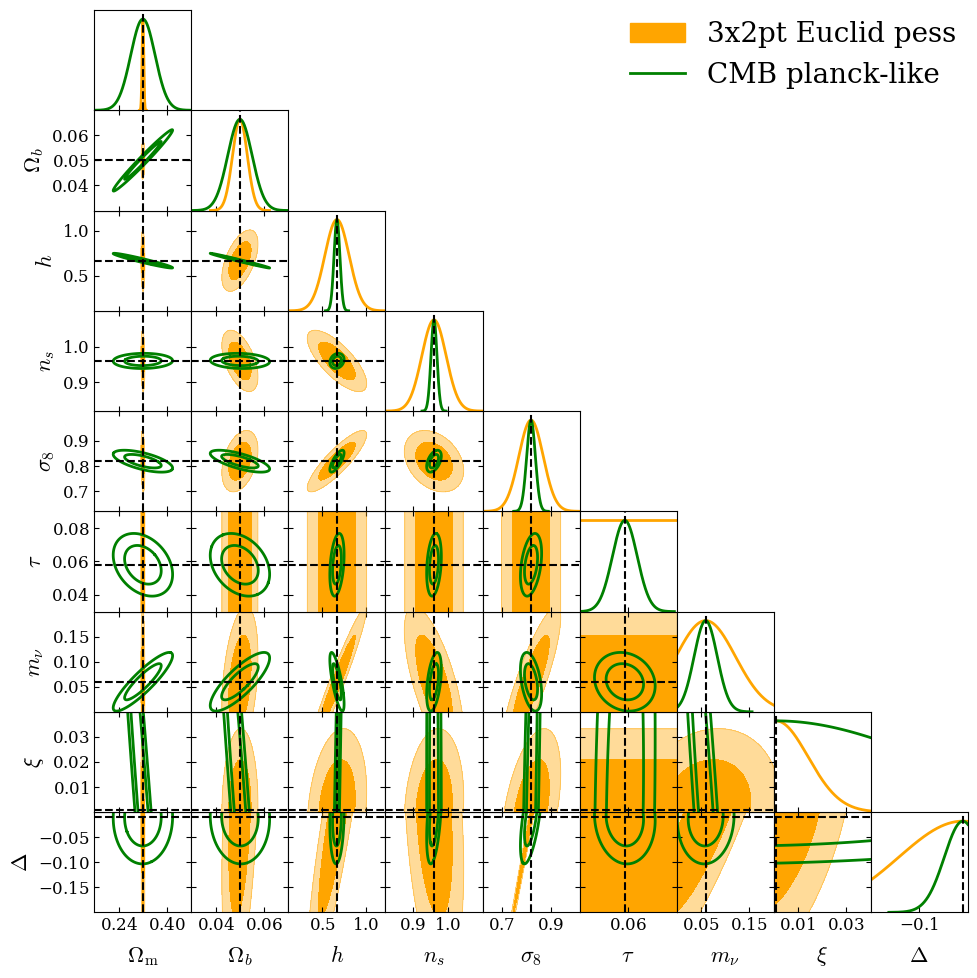

In [17]:
g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=20
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E[specs[0]]['label'], cmb_only[cmbs[0]]['label']]

g.triangle_plot([E[specs[0]]['FMsample'], cmb_only[cmbs[0]]['FMsample']],
                E[specs[0]]['param_names'][0:9],
                filled=[True, False],
                contour_lws = [2, 2, 2],
                legend_labels = leg_lab,
                legend_loc='upper right',
                contour_colors=['orange', 'green'],
                # contour_colors=['orange'],
                markers={p: E[specs[0]]['fiducial'][p] for p in E[specs[0]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

### my fishers NMC euclid 6x2pt vs CMB primaries only (Test in un solo colpo di Euclid +X phionly e CMB primaries only). Also writing the model here

"\nif gcs:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )\nelse:\n    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )\n"

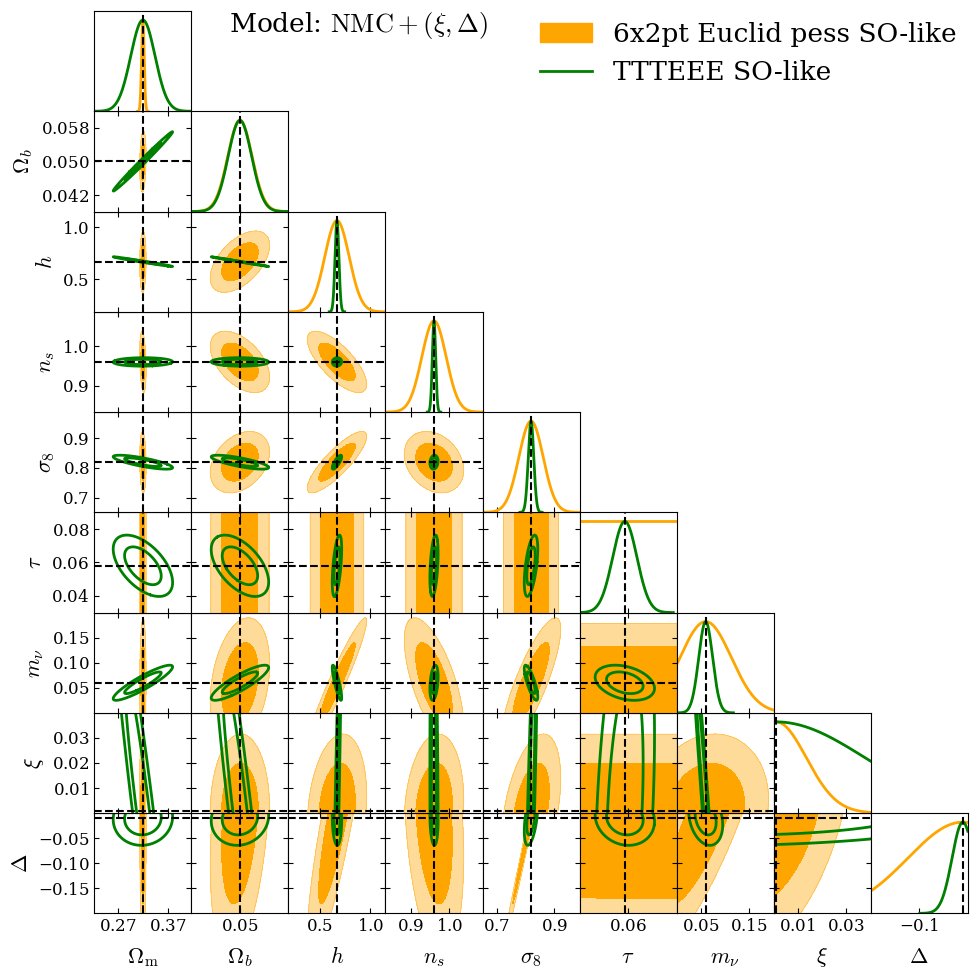

In [18]:
fish_folder = '/media/veracrypt1/work_archives/archives/Code/CMBXC/forecast/cmbx_forecasts_outputs/fishers/mnu/nmcxp_Delta'
model_name = 'NMCxpDelta'

fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta"
]

# in order to plot Euclid alone together with Euclid x CMB I need steph_tau = True
fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)

cmb_only = {}
cmbs = ['planck', 'SO' , 'S4']

for cmb in cmbs:
    cmb_only[cmb] = fut.get_cmb(cmb, probes = 'primonly')

fiducial = {'om':      0.32, 'ob':      0.05, 'h':       0.67, 'ns':      0.96, 'sigma8':  0.8193398040580867, 'tau':     0.058,
    'mnu': 0.06, 'gamma_IG': 1.e-03, 'Delta': -1.e-02,
    'b1':1.0997727037892875, 'b2':1.220245876862528, 'b3':1.2723993083933989, 'b4':1.316624471897739,
    'b5':1.35812370570578,'b6':1.3998214171814918, 'b7':1.4446452851824907, 'b8':1.4964959071110084,
    'b9':1.5652475842498528, 'b10':1.7429859437184225,
    'aIA':1.72, 'eIA':-0.41, 'bIA':2.17,
}

labels = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"\tau", r"m_{\nu}", r"\xi", r"\Delta",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
]

fut = sut.Fish_utils(fish_folder, model_name, fiducial, labels, stephane = False)

specs = ['pess', 'opti']
cmbs = ['planck','SO', 'S4']
mode = 'c'

E_cmb = {}

for spec in specs:
    E_cmb[spec] = {}
    for cmb in cmbs:
        E_cmb[spec][cmb] = fut.get_Ecmb(spec, cmb, mode, probes='phionly')



g = plots.get_subplot_plotter(subplot_size=1,width_inch=10, scaling=False)
g.settings.figure_legend_frame = False
g.settings.axes_fontsize=12
g.settings.axes_labelsize=16
g.settings.legend_fontsize=19
g.settings.axis_marker_color = 'black'
g.settings.axis_marker_ls = '--'
g.settings.axis_marker_lw = 1.5

leg_lab = [E_cmb[specs[0]][cmbs[1]]['label'], cmb_only[cmbs[1]]['label']]

g.triangle_plot([E_cmb[specs[0]][cmbs[1]]['FMsample'], cmb_only[cmbs[1]]['FMsample']],
                E_cmb[specs[0]][cmbs[1]]['param_names'][0:9],
                filled=[True, False],
                contour_lws = [2, 2, 2],
                legend_labels = leg_lab,
                legend_loc='upper right',
                contour_colors=['orange', 'green'],
                # contour_colors=['orange'],
                markers={p: E_cmb[specs[0]][cmbs[1]]['fiducial'][p] for p in E_cmb[specs[0]][cmbs[1]]['param_names']},
                param_limits={'mnu':{0., 0.2}, 'gamma_IG':(0., 4.e-02),'tau':(0.03, 0.09), 'Delta':(-0.2, 0)}
               )
model_tex = E_cmb[specs[0]][cmbs[1]]['model_tex']
plt.suptitle('Model: ' + model_tex, fontsize = 19, x = 0.37)

'''
if gcs:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + '_GCS_Xphi_vs_' + cmb + '_prim' + '.png' )
else:
    g.export(figs_folder + 'LCDM_triangle_cosmo_E' + Espec + 'Xphi_vs_' + cmb + '_prim' + '.png' )
'''

In [26]:
Epess['prec']

array([8.52757800e-03, 6.09816119e-02, 2.07424890e-01, 3.63078287e-02,
       6.02525721e-02, 5.69995267e+02, 0.00000000e+00, 1.31965944e+01,
       1.31623850e+01, 6.00472826e-03, 4.98082869e-03, 4.77871872e-03,
       4.75969977e-03, 4.73030923e-03, 4.75552491e-03, 4.64021276e-03,
       4.64920005e-03, 4.45761402e-03, 4.58467867e-03, 7.94871281e-01,
       2.18847345e+00, 1.52627200e-01])

In [16]:
Epess = euclid_alone(model, 'pess')
Epess['prec']

array([8.52757800e-03, 6.09816119e-02, 2.07424890e-01, 3.63078287e-02,
       6.02525721e-02, 5.69995267e+02, 1.02359542e+00, 1.31965944e+01,
       1.31623850e+01, 6.00472826e-03, 4.98082869e-03, 4.77871872e-03,
       4.75969977e-03, 4.73030923e-03, 4.75552491e-03, 4.64021276e-03,
       4.64920005e-03, 4.45761402e-03, 4.58467867e-03, 7.94871281e-01,
       2.18847345e+00, 1.52627200e-01])

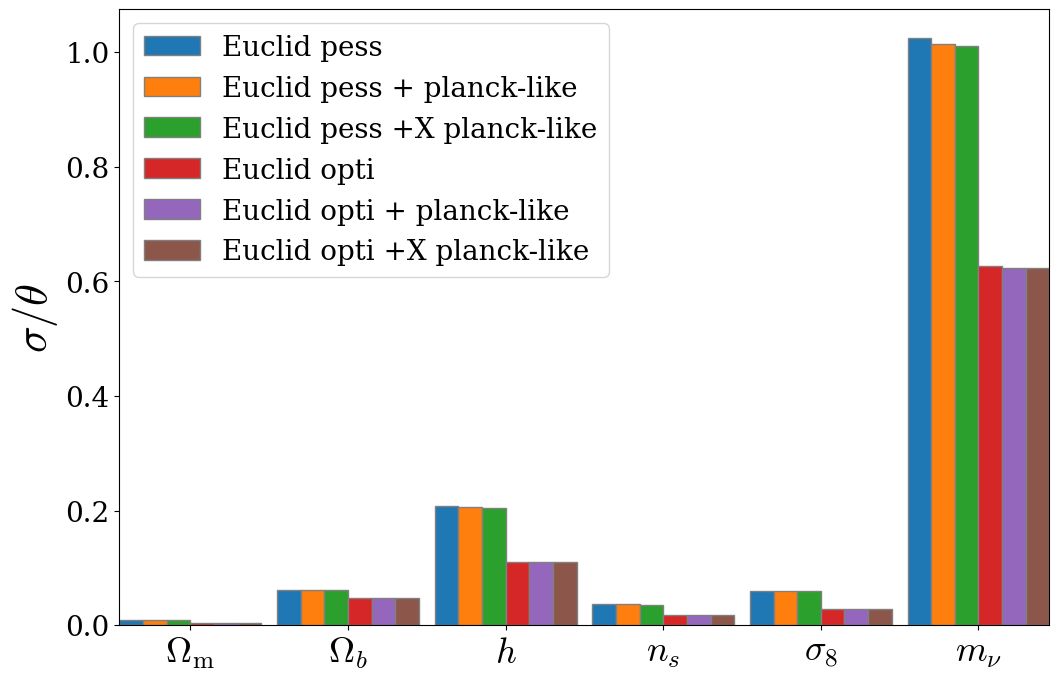

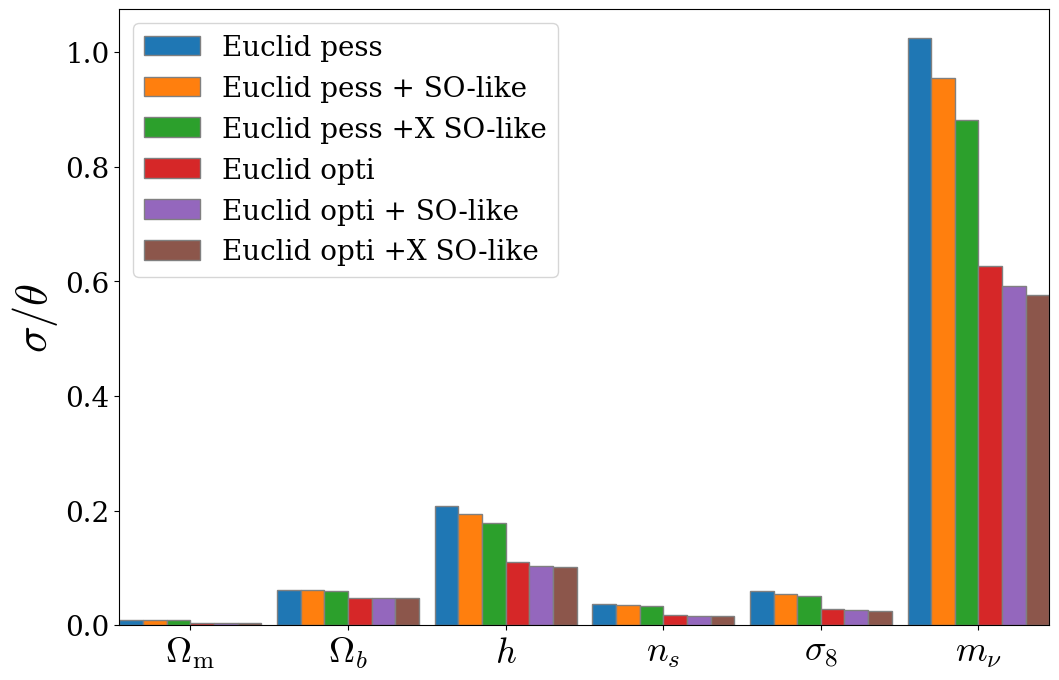

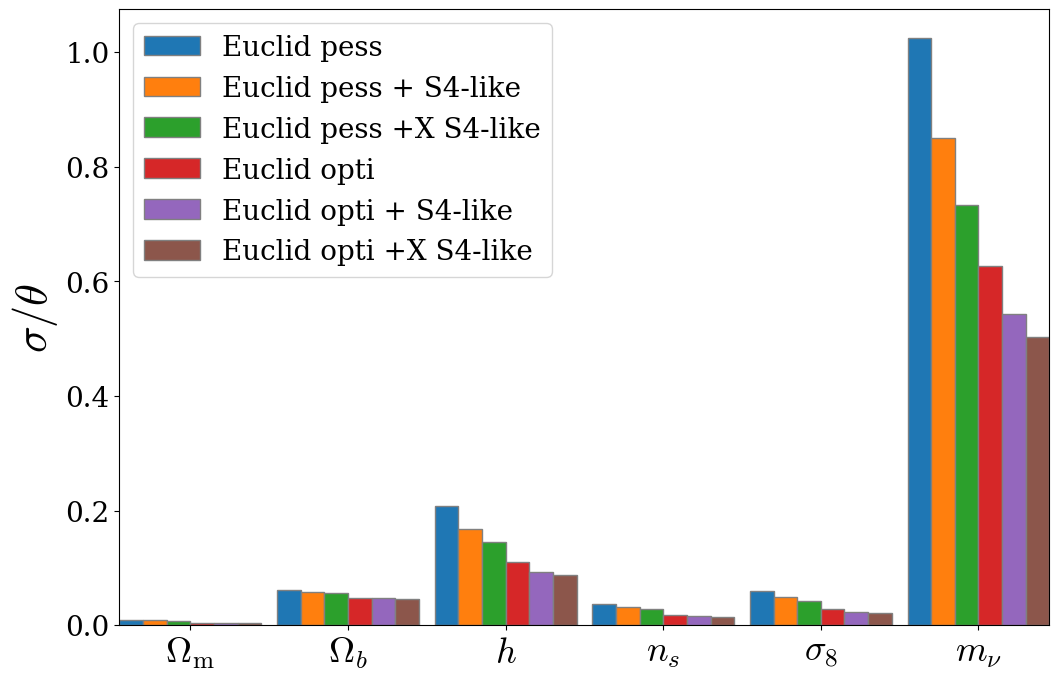

In [21]:
labels_nmcxp_Delta = [
r"\Omega_{\rm m}", r"\Omega_{ b}", r"h", r"n_s", r"\sigma_8", r"m_{\nu}", r"\gamma", r"\Delta",
r"b_1", r"b_2", r"b_3", r"b_4", r"b_5", r"b_6", r"b_7", r"b_8", r"b_9", r"b_{10}",
#r"s_1", r"s_2", r"s_3", r"s_4", r"s_5", r"s_6", r"s_7", r"s_8", r"s_9", r"s_{10}",
r"a_{\rm IA}", r"e_{\rm IA}", r"b_{\rm IA}"
       ]

labels_nmcxp_Delta_tex = [
r"$\Omega_{\rm m}$", r"$\Omega_{ b}$", r"$h$", r"$n_s$", r"$\sigma_8$", r"$m_{ \nu}$", r"$\gamma$", r"$\Delta$",
r"$b_1$", r"$b_2$", r"$b_3$", r"$b_4$", r"$b_5$", r"$b_6$", r"$b_7$", r"$b_8$", r"$b_9$", r"$b_{10}$",
#r"$s_1$", r"$s_2$", r"$s_3$", r"$s_4$", r"$s_5$", r"$s_6$", r"$s_7$", r"$s_8$", r"$s_9$", r"$s_{10}$",
r"$a_{\rm IA}$", r"$e_{\rm IA}$", r"$b_{\rm IA}$"         
]
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('nmcxpDelta')

labs = labels_nmcxp_Delta_tex[:5]
labs.append(labels_nmcxp_Delta_tex[6:])

Especs = ['pess', 'opti']
cmbexp = ['planck', 'SO', 'S4']

probes = 'phionly'

for cmb in cmbexp:
    Epess = euclid_alone(model, 'pess')
    Eopti = euclid_alone(model, 'opti')
    Ep_p_cmb = euclid_cmb(model, 'pess', cmb, 'p', probes)
    Eo_p_cmb = euclid_cmb(model, 'opti', cmb, 'p', probes)
    Ep_c_cmb = euclid_cmb(model, 'pess', cmb, 'c', probes)
    Eo_c_cmb = euclid_cmb(model, 'opti', cmb, 'c', probes)
    
    # set width of bar
    barWidth = 0.15
    fig = plt.subplots(figsize =(12, 8))
    
    # set height of bar
    Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    
    # Set position of bar on X axis
    br1 = np.arange(len(Epess['prec'][:6]))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    br5 = [x + barWidth for x in br4]
    br6 = [x + barWidth for x in br5]
    br7 = [x + barWidth for x in br6]
    
    # Make the plot
    
    plt.bar(br1, Epess['prec'][np.r_[:5, 6:7]], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Epess['label'])
    plt.bar(br2, Ep_p_cmb['prec'][np.r_[:5, 6:7]], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Ep_p_cmb['label'])
    plt.bar(br3, Ep_c_cmb['prec'][np.r_[:5, 6:7]], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Ep_c_cmb['label'])
    
    plt.bar(br4, Eopti['prec'][np.r_[:5, 6:7]], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Eopti['label'])
    plt.bar(br5, Eo_p_cmb['prec'][np.r_[:5, 6:7]], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Eo_p_cmb['label'])
    plt.bar(br6, Eo_c_cmb['prec'][np.r_[:5, 6:7]], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Eo_c_cmb['label'])
    
    # Adding Xticks
    #plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
    plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
    plt.xticks([r + 2.5 * barWidth for r in range(len(Epess['prec'][:6]))],
            labels_nmcxp_Delta_tex[:6], fontsize = 26)
    
    #plt.xticks([r + barWidth for r in range(len(IT))],
    #        ['2015', '2016', '2017', '2018', '2019'])
    plt.yticks(fontsize=20)
    plt.legend(fontsize = 20)
    
    #plt.savefig(figs_folder + model['model'] + '_bars_cosmo_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')
    plt.savefig(figs_folder + 'phionly/' + model['model'] + '_bars_cosmo_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')

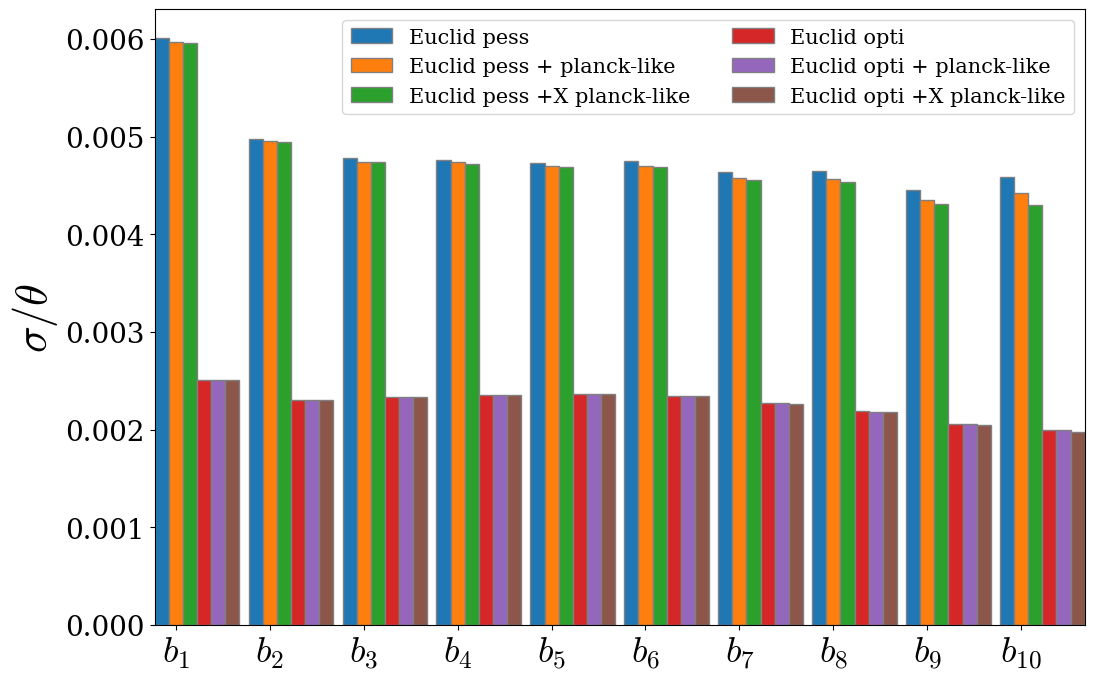

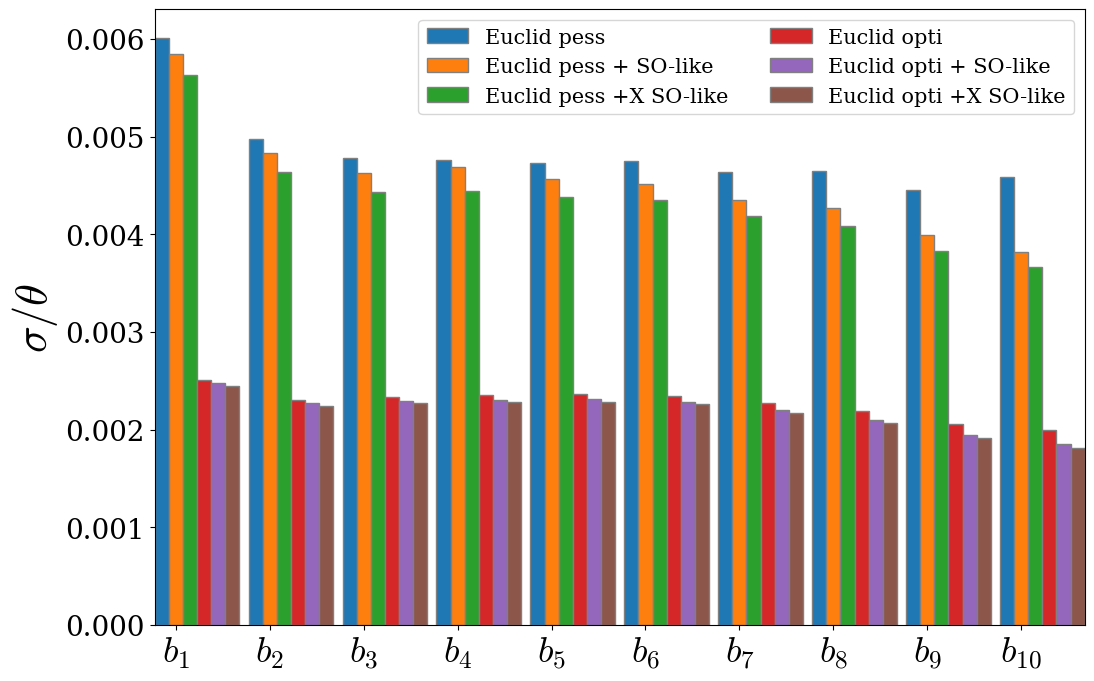

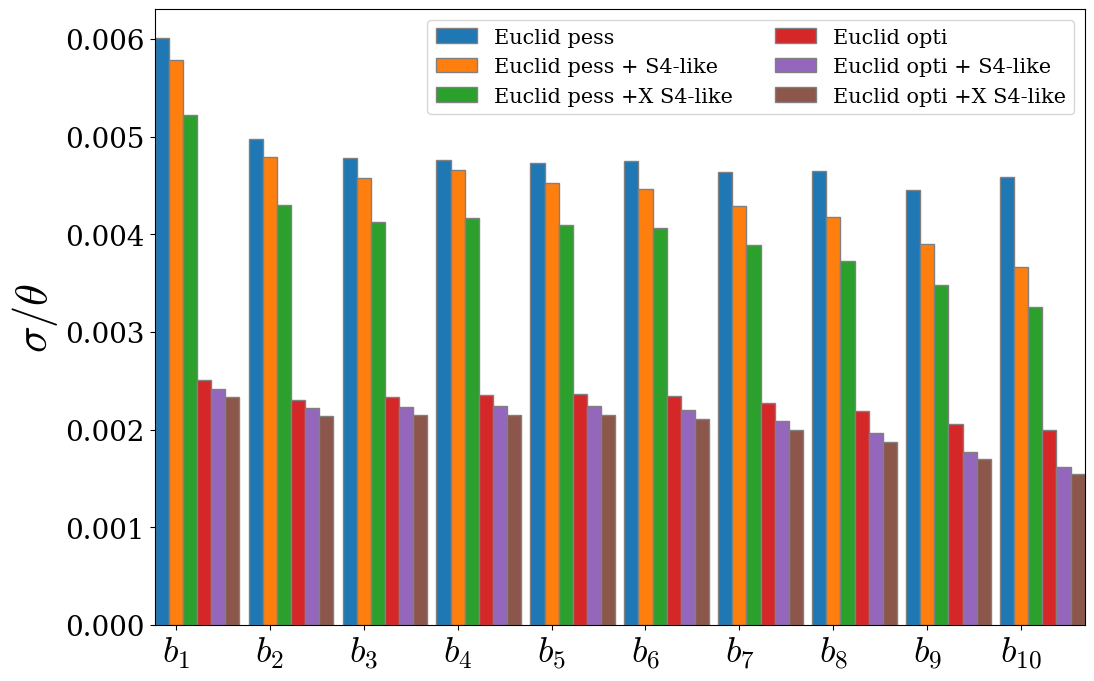

In [23]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('nmcxpDelta')
Especs = ['pess', 'opti']
cmbexp = ['planck', 'SO', 'S4']
labels_plot = labels_nmcxp_Delta_tex[8:18]

probes = 'phionly'
for cmb in cmbexp:
    Epess = euclid_alone(model, 'pess')
    Eopti = euclid_alone(model, 'opti')
    Ep_p_cmb = euclid_cmb(model, 'pess', cmb, 'p', probes)
    Eo_p_cmb = euclid_cmb(model, 'opti', cmb, 'p', probes)
    Ep_c_cmb = euclid_cmb(model, 'pess', cmb, 'c', probes)
    Eo_c_cmb = euclid_cmb(model, 'opti', cmb, 'c', probes)
    
    # set width of bar
    barWidth = 0.15
    fig = plt.subplots(figsize =(12, 8))
    
    # set height of bar
    Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    
    # Set position of bar on X axis
    br1 = np.arange(len(Epess['prec'][9:19]))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    br5 = [x + barWidth for x in br4]
    br6 = [x + barWidth for x in br5]
    
    # Make the plot
    
    plt.bar(br1, Epess['prec'][9:19], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Epess['label'])
    plt.bar(br2, Ep_p_cmb['prec'][9:19], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Ep_p_cmb['label'])
    plt.bar(br3, Ep_c_cmb['prec'][9:19], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Ep_c_cmb['label'])
    
    plt.bar(br4, Eopti['prec'][9:19], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Eopti['label'])
    plt.bar(br5, Eo_p_cmb['prec'][9:19], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Eo_p_cmb['label'])
    plt.bar(br6, Eo_c_cmb['prec'][9:19], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Eo_c_cmb['label'])
    
    # Adding Xticks
    #plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
    plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
    plt.xticks([r + barWidth for r in range(len(Epess['prec'][8:18]))],
            labels_plot, fontsize = 26)
    
    #plt.xticks([r + barWidth for r in range(len(IT))],
    #        ['2015', '2016', '2017', '2018', '2019'])
    plt.yticks(fontsize=20)
    plt.legend(fontsize = 15, ncol =2)
    
    #plt.savefig(figs_folder + model['model'] + '_bars_GC_bias_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')
    plt.savefig(figs_folder + 'phionly/' + model['model'] + '_bars_GC_bias_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')

In [30]:

labels_plot = labels_nmcxp_Delta_tex
labels_plot

['$\\Omega_{\\rm m}$',
 '$\\Omega_{ b}$',
 '$h$',
 '$n_s$',
 '$\\sigma_8$',
 '$m_{ \\nu}$',
 '$\\gamma$',
 '$\\Delta$',
 '$b_1$',
 '$b_2$',
 '$b_3$',
 '$b_4$',
 '$b_5$',
 '$b_6$',
 '$b_7$',
 '$b_8$',
 '$b_9$',
 '$b_{10}$',
 '$a_{\\rm IA}$',
 '$e_{\\rm IA}$',
 '$b_{\\rm IA}$']

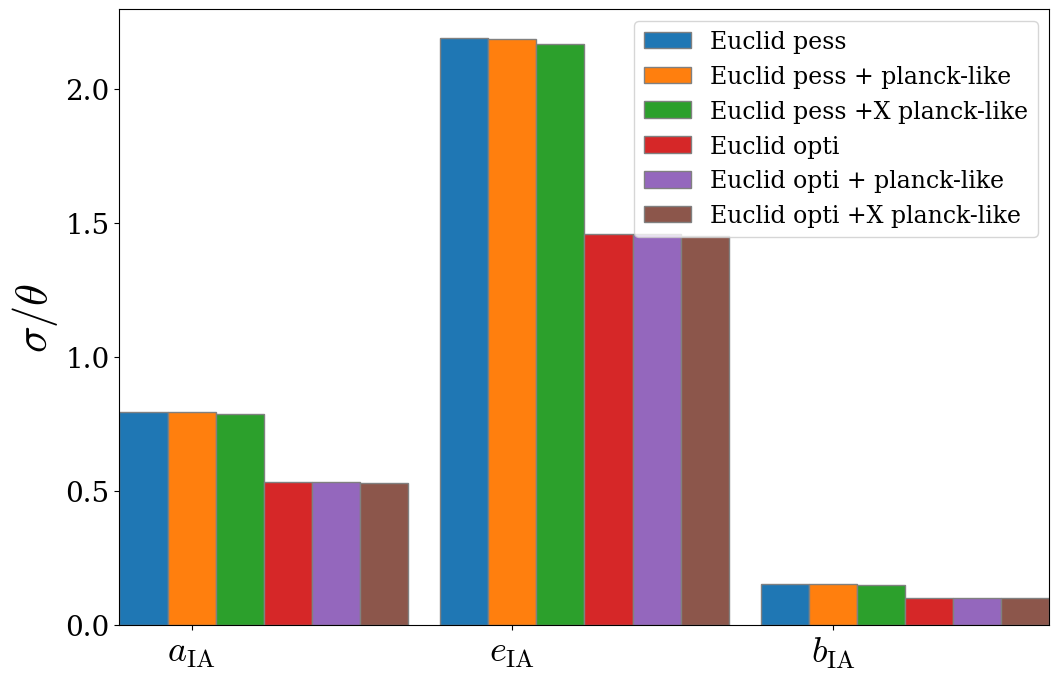

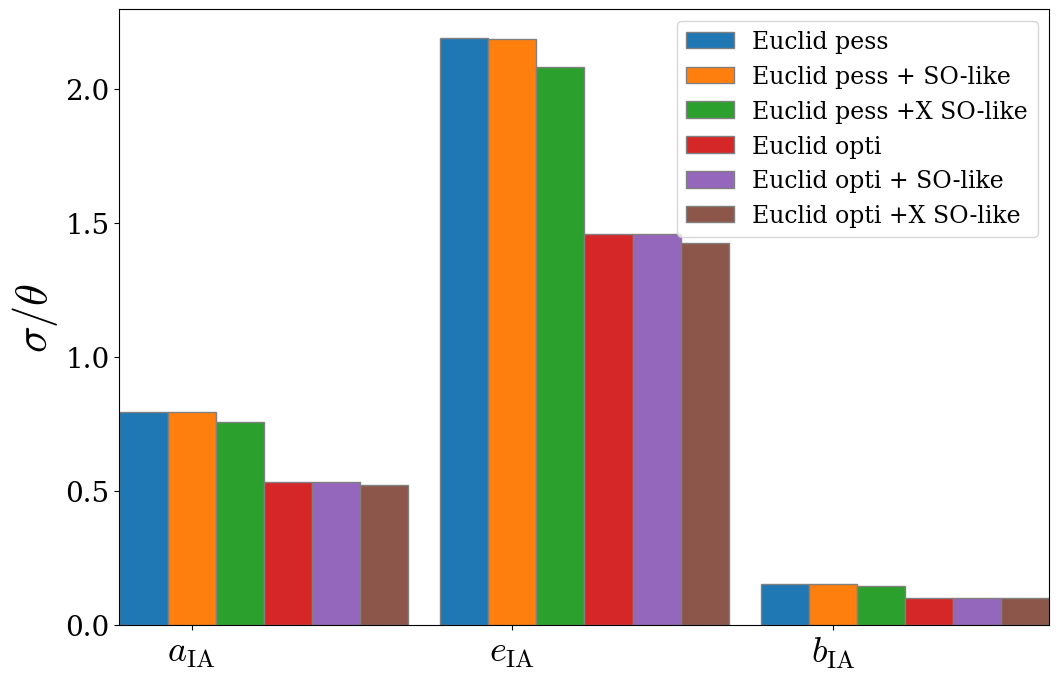

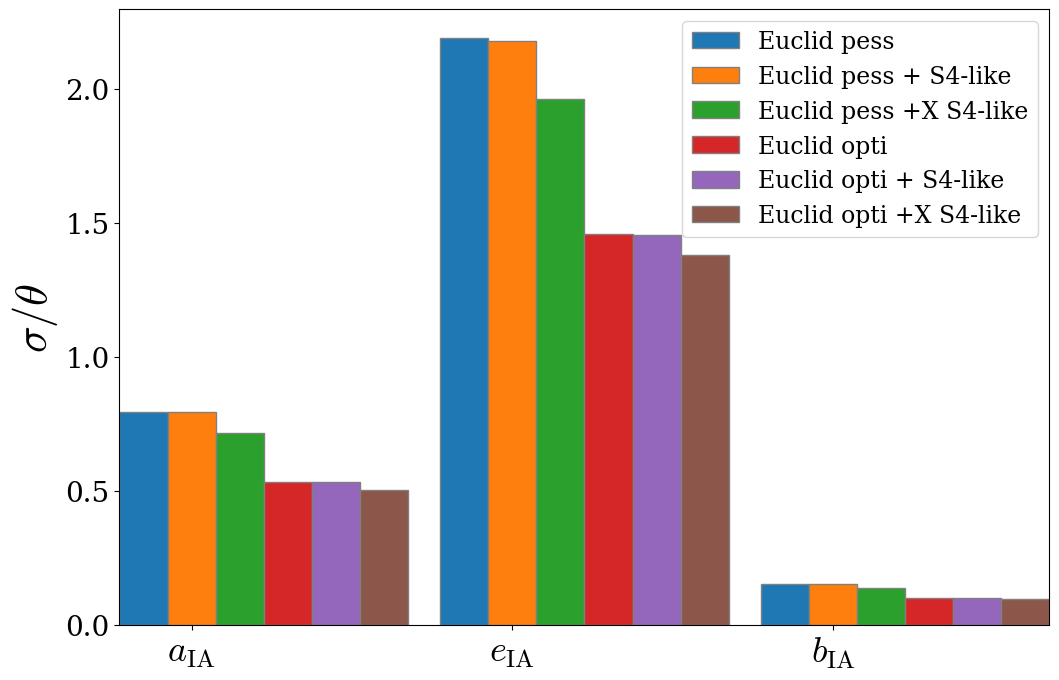

In [31]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('nmcxpDelta')
Especs = ['pess', 'opti']
cmbexp = ['planck', 'SO', 'S4']
labels_plot = labels_nmcxp_Delta_tex[18:]

prbes = 'phionly'
for cmb in cmbexp:
    Epess = euclid_alone(model, 'pess')
    Eopti = euclid_alone(model, 'opti')
    Ep_p_cmb = euclid_cmb(model, 'pess', cmb, 'p', probes)
    Eo_p_cmb = euclid_cmb(model, 'opti', cmb, 'p', probes)
    Ep_c_cmb = euclid_cmb(model, 'pess', cmb, 'c', probes)
    Eo_c_cmb = euclid_cmb(model, 'opti', cmb, 'c', probes)
    
    # set width of bar
    barWidth = 0.15
    fig = plt.subplots(figsize =(12, 8))
    
    # set height of bar
    Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    
    # Set position of bar on X axis
    br1 = np.arange(len(Epess['prec'][19:]))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    br5 = [x + barWidth for x in br4]
    br6 = [x + barWidth for x in br5]
    
    # Make the plot
    
    plt.bar(br1, Epess['prec'][19:], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Epess['label'])
    plt.bar(br2, Ep_p_cmb['prec'][19:], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Ep_p_cmb['label'])
    plt.bar(br3, Ep_c_cmb['prec'][19:], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Ep_c_cmb['label'])
    
    plt.bar(br4, Eopti['prec'][19:], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Eopti['label'])
    plt.bar(br5, Eo_p_cmb['prec'][19:], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Eo_p_cmb['label'])
    plt.bar(br6, Eo_c_cmb['prec'][19:], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Eo_c_cmb['label'])
    
    # Adding Xticks
    #plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
    plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
    plt.xticks([r + barWidth for r in range(len(Epess['prec'][19:]))],
            labels_plot, fontsize = 26)
    
    #plt.xticks([r + barWidth for r in range(len(IT))],
    #        ['2015', '2016', '2017', '2018', '2019'])
    plt.yticks(fontsize=20)
    plt.legend(fontsize = 17, ncol =1)
    
    #plt.savefig(meet_figs + 'bars_IA_E' + Espec + '_pc_' + cmb + '_' + model['model'] + '.png', bbox_inches = 'tight')
    #plt.savefig(figs_folder + model['model'] + '_bars_IA_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')
    plt.savefig(figs_folder + 'phionly/' + model['model'] + '_bars_IA_E_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')

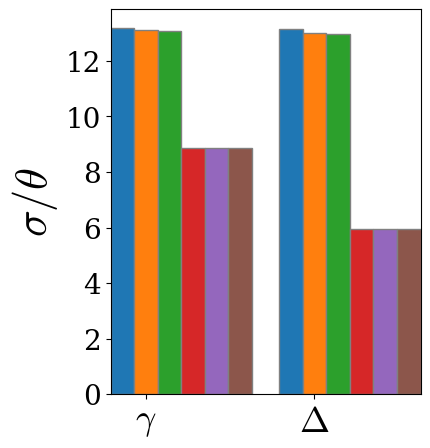

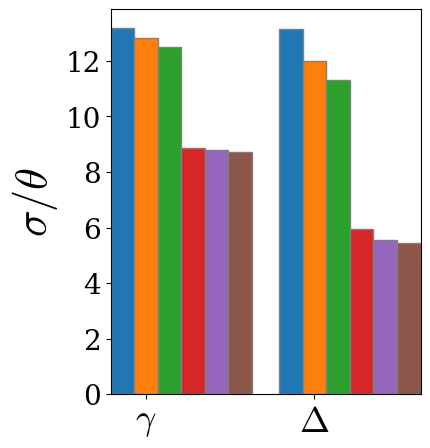

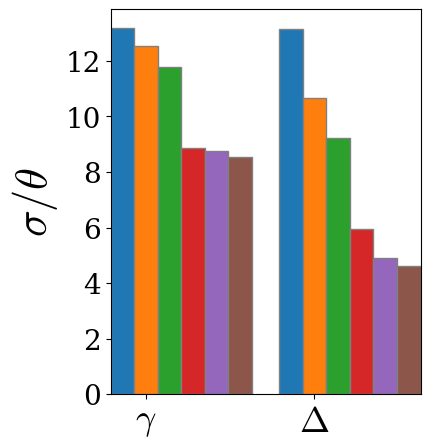

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('nmcxpDelta')
Especs = ['pess', 'opti']
cmbexp = ['planck', 'SO', 'S4']
labels_plot = labels_nmcxp_Delta_tex[6:8]

probes = 'phionly'
for cmb in cmbexp:
    Epess = euclid_alone(model, 'pess')
    Eopti = euclid_alone(model, 'opti')
    Ep_p_cmb = euclid_cmb(model, 'pess', cmb, 'p', probes)
    Eo_p_cmb = euclid_cmb(model, 'opti', cmb, 'p', probes)
    Ep_c_cmb = euclid_cmb(model, 'pess', cmb, 'c', probes)
    Eo_c_cmb = euclid_cmb(model, 'opti', cmb, 'c', probes)
    
    # set width of bar
    #barWidth = 0.05
    barWidth = 0.14
    #fig = plt.subplots(figsize =(2,5))
    fig = plt.subplots(figsize =(4, 5))
    
    # set height of bar
    Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
    
    # Set position of bar on X axis
    #br1 = np.arange(len(Epess['prec'][7]))
    br1 = np.arange(2)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    br5 = [x + barWidth for x in br4]
    br6 = [x + barWidth for x in br5]
    
    # Make the plot
    
    plt.bar(br1, Epess['prec'][7:9], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Epess['label'])
    plt.bar(br2, Ep_p_cmb['prec'][7:9], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Ep_p_cmb['label'])
    plt.bar(br3, Ep_c_cmb['prec'][7:9], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Ep_c_cmb['label'])
    
    plt.bar(br4, Eopti['prec'][7:9], #color ='r',
            width = barWidth,
            edgecolor ='grey', label = Eopti['label'])
    plt.bar(br5, Eo_p_cmb['prec'][7:9], #color ='g',
            width = barWidth,
            edgecolor ='grey', label = Eo_p_cmb['label'])
    plt.bar(br6, Eo_c_cmb['prec'][7:9], #color ='b',
            width = barWidth,
            edgecolor ='grey', label = Eo_c_cmb['label'])
    
    # Adding Xticks
    #plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
    plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
    #plt.xticks([barWidth],[r'$\gamma$'], fontsize = 22) # this is for IG when there is just gamma
    plt.xticks([r + barWidth for r in range(len(Epess['prec'][6:8]))],
            labels_plot, fontsize = 26)
    
    plt.yticks(fontsize=20)
    #plt.legend(fontsize = 17, ncol =1)
    
    #plt.savefig(meet_figs + 'bars_gamma_IG_E' + '_pc_' + cmb + '_' + model['model'] + '.png', bbox_inches = 'tight')
    #plt.savefig(figs_folder + model['model'] + '_bars_xi_Delta_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')
    plt.savefig(figs_folder + 'phionly/' + model['model'] + '_bars_xi_Delta_' + '_'.join(Especs) + '_pc_' + cmb + '.png', bbox_inches = 'tight')

### Comparison with 1D errors from paper of the theory group (Forecast on JBD)

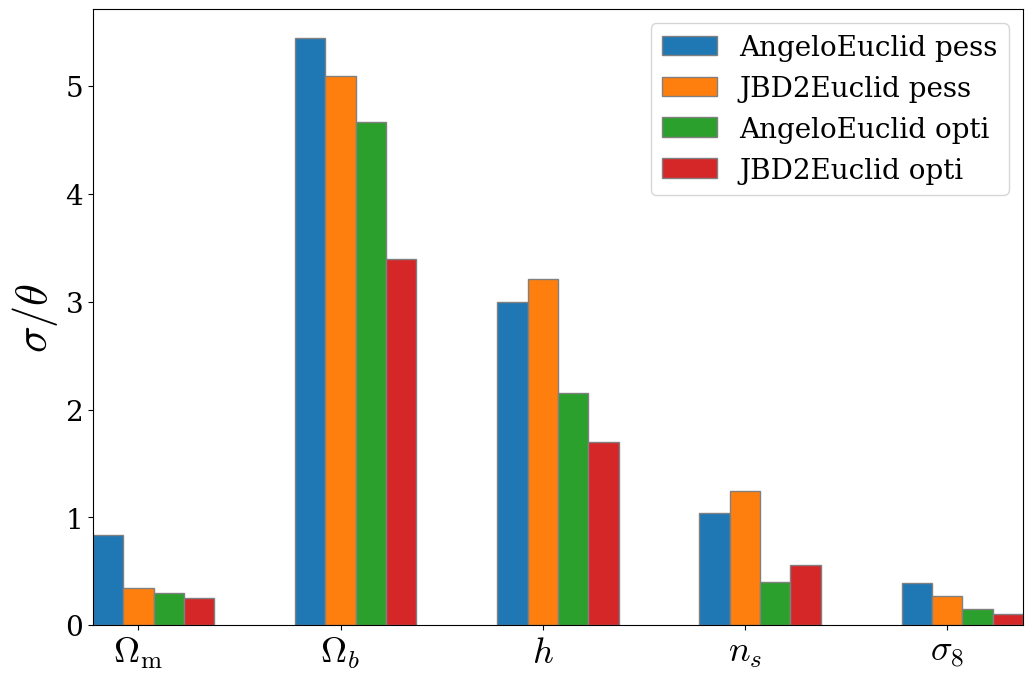

In [17]:

import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('IG')
Especs = ['pess', 'opti']

Epess = euclid_alone(model, 'pess')
Eopti = euclid_alone(model, 'opti')

jbd2_pess = [0.34, 5.09, 3.21, 1.24, 0.27]
jbd2_opti = [0.25, 3.4, 1.70, 0.56, 0.10 ]

ist_lcdm_pess = [0.0081, 0.052, 0.027, 0.0085, 0.0038]
ist_lcdm_opti = [0.0028, 0.046, 0.020, 0.0036, 0.0013]

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it

# Set position of bar on X axis
br1 = np.arange(len(Epess['prec'][:5]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
#br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]

# Make the plot

plt.bar(br1, 100*Epess['prec'][:5], #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'Angelo' + Epess['label'])
plt.bar(br2, jbd2_pess, #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'JBD2' + Epess['label'])

plt.bar(br3, 100*Eopti['prec'][:5], #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'Angelo' + Eopti['label'])
plt.bar(br4, jbd2_opti, #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'JBD2' + Eopti['label'])

# Adding Xticks
#plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
plt.xticks([r + barWidth for r in range(len(Epess['prec'][:5]))],
        labels_IG_tex[:5], fontsize = 26)

#plt.xticks([r + barWidth for r in range(len(IT))],
#        ['2015', '2016', '2017', '2018', '2019'])
plt.yticks(fontsize=20)
plt.legend(fontsize = 20, ncol =1)

plt.savefig('/home/anferrar/Code/CMBXC/forecast/figures/comparison_JBD_theory/Angelo_vs_JBD2.png', bbox_inches = 'tight')

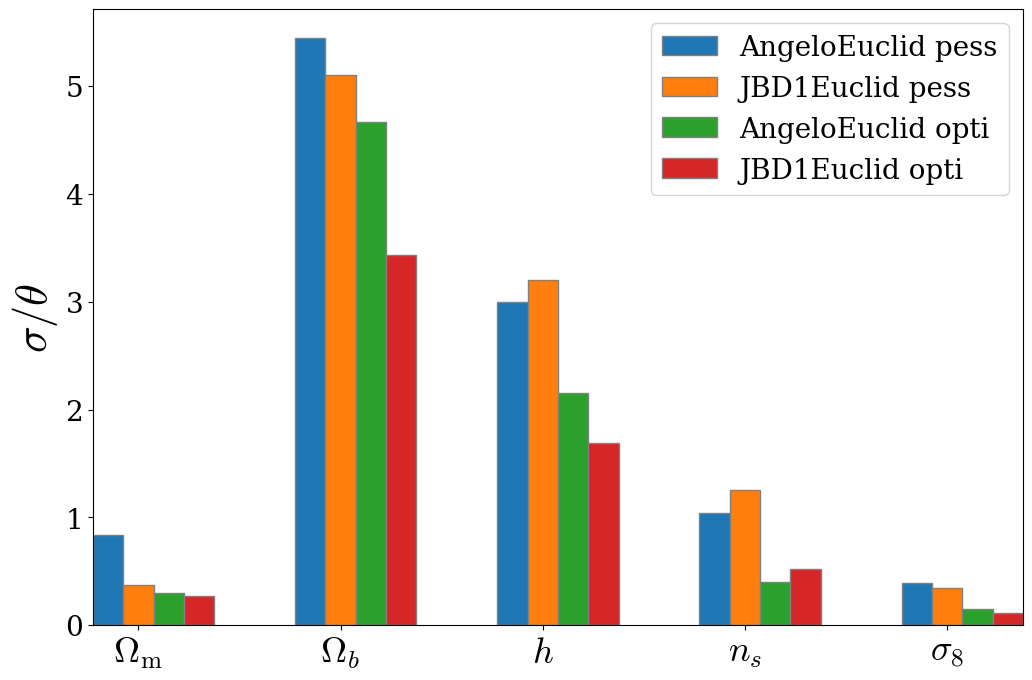

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme()
 
model = set_model('IG')
Especs = ['pess', 'opti']

Epess = euclid_alone(model, 'pess')
Eopti = euclid_alone(model, 'opti')

jbd1_pess = [0.37, 5.10, 3.20, 1.25, 0.34]
jbd1_opti = [0.27, 3.43, 1.69, 0.52, 0.11 ]

ist_lcdm_pess = [0.0081, 0.052, 0.027, 0.0085, 0.0038]
ist_lcdm_opti = [0.0028, 0.046, 0.020, 0.0036, 0.0013]

# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Epess['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it
Eopti['prec'][5] = 0. # setting Euclid alone error on tau to zero so it doesn't plot it

# Set position of bar on X axis
br1 = np.arange(len(Epess['prec'][:5]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
#br5 = [x + barWidth for x in br4]
#br6 = [x + barWidth for x in br5]

# Make the plot

plt.bar(br1, 100*Epess['prec'][:5], #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'Angelo' + Epess['label'])
plt.bar(br2, jbd1_pess, #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'JBD1' + Epess['label'])

plt.bar(br3, 100*Eopti['prec'][:5], #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'Angelo' + Eopti['label'])
plt.bar(br4, jbd1_opti, #color ='r',
        width = barWidth,
        edgecolor ='grey', label = 'JBD1' + Eopti['label'])

# Adding Xticks
#plt.xlabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 15)
plt.ylabel(r'$\sigma/\theta$', fontweight ='bold', fontsize = 32)
plt.xticks([r + barWidth for r in range(len(Epess['prec'][:5]))],
        labels_IG_tex[:5], fontsize = 26)

#plt.xticks([r + barWidth for r in range(len(IT))],
#        ['2015', '2016', '2017', '2018', '2019'])
plt.yticks(fontsize=20)
plt.legend(fontsize = 20, ncol =1)

#plt.savefig(meet_figs + 'bars_cosmo_E' + Espec + '_pc_' + cmb + '_' + model['model'] + '.png', bbox_inches = 'tight')
plt.savefig('/home/anferrar/Code/CMBXC/forecast/figures/comparison_JBD_theory/Angelo_vs_JBD1.png', bbox_inches = 'tight')